___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 8: Unsupervised learning

## Lab work 8



#### Мета: 

* навчитися використовувати моделі без учителем

### Завдання 1:

Опрацюйте файл `Groceries.csv`. Використовуючи алгоритм асоціативних зв'язків, знайдіть:
- зробіть описову статистику даного файлу
- ведіть топ-3 продукти, що продаються
- виведіть топ-2 пари продуктів, що продаються
- придумайте, як отриману інформацію можна використатти (опишіть в 3-4 реченнях)

In [6]:
import sys
!{sys.executable} -m pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=23bcdb0ac293570abf5d5645dc339ceca1b2fbe3336b6b274fe7549bc5addb90
  Stored in directory: c:\users\paul\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [18]:
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from apyori import apriori

ds = pd.read_csv('Groceries.csv')
ds.head(7)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ds.describe()

,Item(s)
count,9835.000000
mean,4.409456
std,3.589385
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,32.000000


In [5]:
ds.shape

(9835, 33)

In [84]:
from warnings import filterwarnings
filterwarnings ('ignore')

goods = pd.Series([])
for j in range(1, 33):
    field = 'Item ' + str(j)
    goods = pd.concat([goods, ds[field].value_counts()])
    
goods.reset_index()
df = pd.DataFrame(goods).reset_index()
goods.columns = ['Name', 'count']    
df.columns = ['Name', 'count']   

summed = df.groupby(['Name'])['count'].sum().nlargest(3) 

print('Top 3 best selling products: ', summed)


Top 3 best selling products:  Name
whole milk          2513
other vegetables    1903
rolls/buns          1809
Name: count, dtype: int64


In [113]:
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from apyori import apriori
from IPython.display import display, HTML
import json #преобразовывать будем в json, используя встроенные в модуль методы
import shutil, os 

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
    
ds = pd.read_csv('Groceries.csv')

goods = []
df = ds.iloc[: , 1:]
print(df.shape)
#print(df)
for i in range(0, 9835):
    goods.append([str(df.values[i,j]) for j in range(0, 32) ])
    
association_rules = apriori(goods, min_support=0.0045, min_confidence=0.2, min_lift=3)

results = list(association_rules)

df_ = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

#print(results)

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

df_['Items'] = list(map(set, Items))                                   
df_['Antecedent'] = list(map(set, Antecedent))
df_['Consequent'] = list(map(set, Consequent))
df_['Support'] = Support
df_['Confidence'] = Confidence
df_['Lift']= Lift



print('Head: ', df_.head(5))

print('')
print('Sorted by CONFIDENCE: ') 
print(df_[['Items', 'Antecedent', 'Confidence']].sort_values(by ='Confidence', ascending = False))
print('')
print('Sorted by SUPPORT: ') 
print(df_[['Items', 'Antecedent', 'Support']].sort_values(by ='Support', ascending = False))
print('')
print('Sorted by LIFT: ') 
print(df_[['Items', 'Antecedent', 'Lift']].sort_values(by ='Lift', ascending = False))

#for item in association_rules:
#    pair = item[0] 
#    items = [x for x in pair]
#    print("Rule: " + items[0] + " -> " + items[1] )

#    print("Support: " + str(item[1]))

#    print("Confidence: " + str(item[2][0][2]))
#    print("Lift: " + str(item[2][0][3]))
#    print("=====================================")

(9835, 32)
Head:                                   Items        Antecedent  \
0  {whipped/sour cream, baking powder}   {baking powder}   
1              {beef, root vegetables}            {beef}   
2        {berries, whipped/sour cream}         {berries}   
3               {bottled beer, liquor}          {liquor}   
4       {bottled beer, red/blush wine}  {red/blush wine}   

             Consequent   Support  Confidence      Lift  
0  {whipped/sour cream}  0.004575    0.258621  3.607850  
1     {root vegetables}  0.017387    0.331395  3.040367  
2  {whipped/sour cream}  0.009049    0.272171  3.796886  
3        {bottled beer}  0.004677    0.422018  5.240594  
4        {bottled beer}  0.004881    0.253968  3.153760  

Sorder by CONFIDENCE: 
                                                 Items  \
117  {whole milk, other vegetables, citrus fruit, r...   
215  {whole milk, citrus fruit, root vegetables, ot...   
213  {whole milk, citrus fruit, root vegetables, ot...   
236  {whole milk,

Анализируя показатели <u>Associations rules</u> для данного <b>ДатаСета</b> можно, например, по показателю <b>LIFT</b> определить, что наличие у покупателя в товарной корзине муки(flour) в разы повышает вероятность того, что в этой корзине будет и сахар(sugar). По показателю <b>SUPPORT</b> видно, что наиболее часто вместе приобретаются мясо(beef) и овощи-корнеплоды(root vegetables), что достаточно логично и объяснимо. Возможно, нужно проделать более детальный анализ в других (из 301) наборах, чтобы, к примеру, определить взаимосвязь каких-то пар с другими с последующим анализом расположения товарных позиций относительно друг друга в магазине, чтобы улучшить логистику размещения товаров на полках и стимуляции покупательских затрат на основании статистики.

### Завдання 2:

Завантажте файл https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
 
- Спробуйте провести кластеризацію, тобто виділити цільові групи, для яких можна впроваджувати певні маркетингові акції
- Опишіть отримані результати

In [119]:
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from apyori import apriori

df = pd.read_csv('Mall_Customers.csv')
print(df.shape)
df.head(7)

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40
5  Female   22                  17                      76
6  Female   35                  18                       6


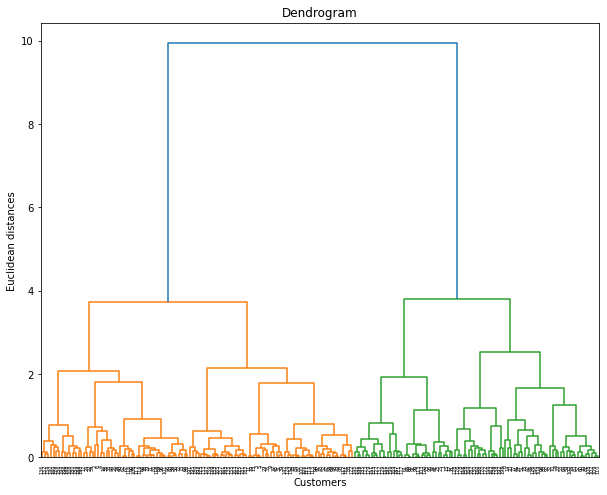

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 13.156547
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.811409
[t-SNE] KL divergence after 300 iterations: 0.274049
     Age  Annual Income (k$)  Spending Score (1-100)  Sex
0     19                  15                      39    1
1     21                  15                      81    1
2     20                  16                       6    0
3     23                  16                      77    0
4     31                  17                      40    0
..   ...                 ...                     ...  ...
195   35                 120                      79    0
196   45                 126                      28    0
197   32                 126                      74    1
198   32                 137                      18   

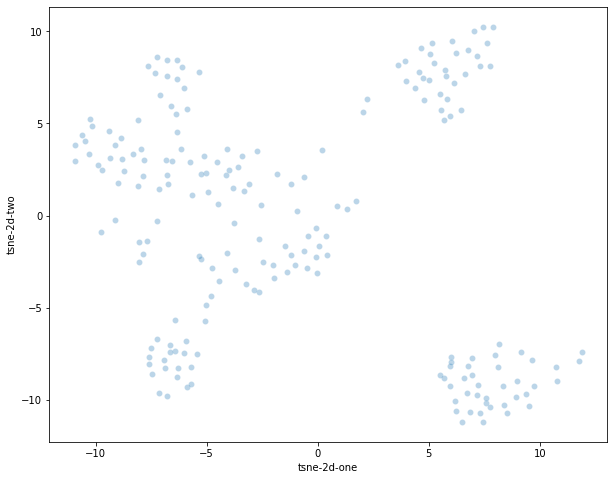

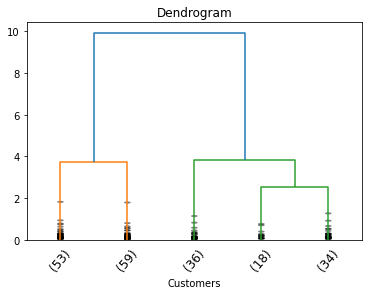

53
(array([  2,   4,   6,  12,  16,  22,  24,  26,  28,  34,  36,  38,  40,
        44,  46,  50,  54,  56,  62,  63,  66,  67,  71,  72,  73,  76,
        79,  83,  86,  89,  90,  96, 101, 106, 116, 117, 118, 119, 136,
       140, 148, 152, 154, 160, 168, 174, 180, 184, 186, 188, 190, 194,
       196], dtype=int64),)
59
(array([  3,   5,   7,   9,  11,  13,  19,  29,  31,  35,  37,  39,  43,
        45,  47,  48,  49,  52,  58,  69,  78,  84,  87,  88,  93,  94,
        97, 100, 105, 111, 112, 114, 115, 121, 122, 124, 125, 132, 133,
       135, 139, 142, 143, 147, 153, 155, 157, 159, 161, 163, 165, 167,
       175, 181, 183, 189, 191, 193, 195], dtype=int64),)
36
(array([  1,  15,  17,  21,  23,  25,  33,  41,  61,  65,  68,  75,  91,
        95,  99, 103, 113, 120, 123, 127, 129, 131, 137, 141, 145, 149,
       151, 169, 171, 173, 177, 179, 185, 187, 197, 199], dtype=int64),)
18
(array([128, 130, 134, 138, 144, 150, 156, 158, 162, 164, 166, 170, 172,
       176, 178, 182, 192, 198], 

In [220]:
import sklearn as sk, pandas as pd, numpy as np, matplotlib.pyplot as plt
from apyori import apriori
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from scipy.spatial.distance import pdist
from matplotlib.pyplot import figure

import time
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.patheffects as PathEffects

figure(figsize=(10, 8))

scaler = MinMaxScaler()

df = pd.read_csv('Mall_Customers.csv')
#print(df.shape)
#print(df.head(7))
#Y = ds["CustomerID"]

df = ds.iloc[: , 1:]

print(df.head(7))

df["Sex"] = df.apply(lambda x: 1 if x.Gender == 'Male' else 0, axis=1)
df = df.iloc[: , 1:]

scaler.fit(df)
df_scaled = scaler.transform(df)

#tsne = TSNE(random_state=0)
#tsne_results = tsne.fit_transform(df_scaled)
#df['label'] = Y
#colors=['yellow', 'black', 'cyan', 'green', 'blue', 'red', 'brown','crimson', 'gold', 'indigo']

#plot_scatter( tsne_results, Y)
#print(df_scaled)
#mergings = linkage(data,  method='ward')
l = linkage(df_scaled, method = 'ward')
dendrogram(l)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
#plt.legend()
plt.show()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)

print(df)

df['tsne-2d-one'] = tsne_results[:,0] 
df['tsne-2d-two'] = tsne_results[:,1] 

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="Age",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)
plt.show()

plt.figure(figsize=(6, 4))
dendrogram(linkage(df_scaled, method = 'ward'),
           truncate_mode='lastp',   
           p=5,  
           leaf_rotation=50,
           show_contracted=True)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.show()

Z = linkage(df_scaled, method='ward')
monocrit = np.zeros((Z.shape[0], ))
monocrit[[-1, -2, -3, -4]] = 1
fc = fcluster(Z, 0, criterion='monocrit', monocrit=monocrit)

for k in range(1, 6):
    arr = np.where(fc == k)
    #print(len(np.asarray(arr)[0]))
    print(len(arr[0]))
    print(arr)

Наша задача - попробовать определить возможные кластеры в предоставляемом датасете. Вначале нормализуем датасет, чтобы привести масштабы характеристик к одному знаменателю. Возьмём <b>MinMaxScaler</b>. После этого построим Дендрограмму. Видим, что данный график не даёт чёткого понимания о возможных группировках-кластерах. Попробуем визуализировать кластера другим способом - через <b>TSNE</b> (Стохастическое вложение соседей с t-распределением (англ. t-distributed Stochastic Neighbor Embedding, t-SNE)). Картина становится более чёткой - мы видим, что можно сформировать 5 групп-кластеров. Снова строим Дендрограмму, но уже передав ей подсказку на деление ДатаСета на 5 кластеров. Теперь картина более чёткая. Выбираем согласно полученной группировке индексы строк, чтобы выбрать данные из исходного датасета и уже работать с конкретными значениями строк об <b>Age,  Annual Income (k$),  Spending Score (1-100),  Gender</b>. 